### Description
This is an analysis of a fictional company. The dataset is provided in the 'data.csv' file, which has 5 columns that represent date ('Дата'), warehouse ('Склад'), counterparty ('Контрагент'), product names ('Номенклатура') and sales quantity ('Количество'). The goal of this analysis is looking at trends, anomalies and some specific cases.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading data
df = pd.read_csv('data.csv')

# Printing out the first few rows
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Checking the column formats

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Дата          301355 non-null  object
 1   Склад         301355 non-null  int64 
 2   Контрагент    301355 non-null  object
 3   Номенклатура  301355 non-null  object
 4   Количество    301355 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


Changing the date column into the correct format

In [4]:
df['Дата'] = pd.to_datetime(df['Дата'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Дата          301355 non-null  datetime64[ns]
 1   Склад         301355 non-null  int64         
 2   Контрагент    301355 non-null  object        
 3   Номенклатура  301355 non-null  object        
 4   Количество    301355 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 11.5+ MB


Grouping data by date and calculating the daily sales quantity

In [5]:
grouped_df = df.groupby('Дата').agg(Daily_sales=('Количество','sum')).reset_index()

First few roes of the grouped data

In [6]:
grouped_df.head(8)

,Дата,Daily_sales
0,2018-01-04,3734
1,2018-01-05,3643
2,2018-01-06,3193
3,2018-01-07,3298
4,2018-01-09,4055
5,2018-01-10,3653
6,2018-01-11,3176
7,2018-01-12,3092


<b>Plotting a graph of the sales quantity schedule for grouped_df

In [7]:
# Transforming date into a more convenient form so that the x-axis is not as crowded
date_format = pd.DataFrame(grouped_df['Дата'].dt.strftime('%m/%y'))
date_format = date_format.drop_duplicates().reset_index().drop('index',axis=1)
date_format

,Дата
0,01/18
1,02/18
2,03/18
3,04/18
4,05/18
5,06/18
6,07/18
7,08/18


In [8]:
# Creating values for the x-axis
xticks = pd.Series([f'2018-0{i}-15' for i in grouped_df['Дата'].dt.month.drop_duplicates().reset_index().drop('index',axis=1)['Дата']])
xticks = pd.to_datetime(xticks)

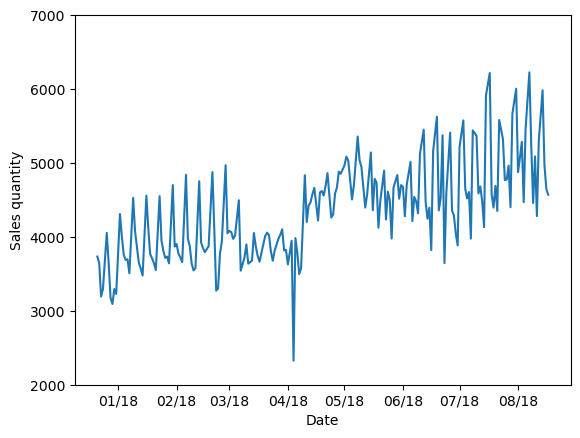

In [9]:
# Plotting a graph using the above 2 cells
plt.plot(grouped_df['Дата'],grouped_df['Daily_sales'])
plt.xlabel('Date')
plt.ylabel('Sales quantity')
plt.yticks(np.arange(2000,8000,1000))
plt.xticks(ticks=xticks,labels=date_format['Дата']);

There are strong oscillations intramonth as can be seen on the graph. This might be correlated with differing sales quantities by days of week. Also the graph is increasing which might suggest that there are greater sales by quantity in the summer than in the winter. There is also a prominent decline and a sideways movement by the end of March - start of April which might imply that there is some seasonality involved. On top of that. there is a drastic drop at the end of April, which looks more like an outlier.

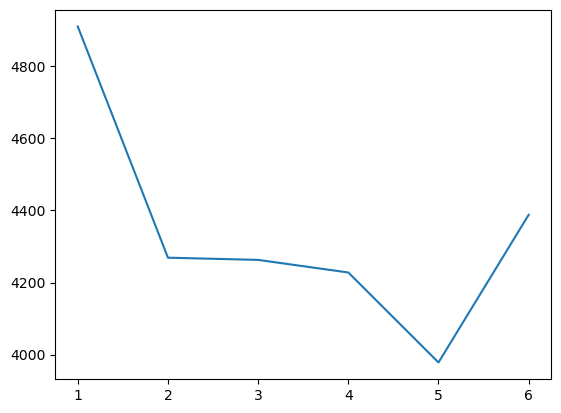

In [11]:
# Checking how sales quanity differs by days of week
grouped_df['Weekday'] = grouped_df['Дата'].dt.weekday
plt.plot(grouped_df['Weekday'].drop_duplicates().sort_values(),grouped_df.groupby('Weekday').mean('Daily_sales')['Daily_sales']);

There really is a difference in sales quantity: more at the start and less at the end of the week.

<b>Finding the row with the biggest outlier in terms of sales quantity

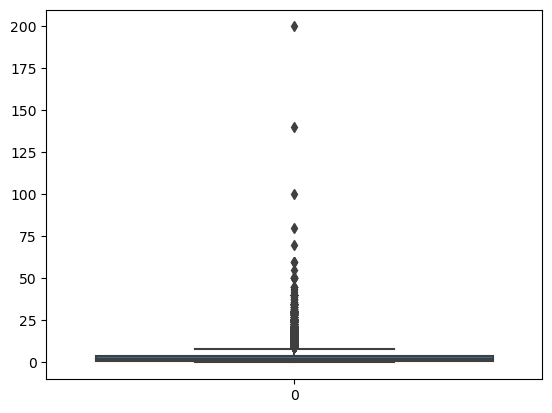

In [12]:
# Visualizing values first
sns.boxplot(df['Количество']);

There is the big outlier with the value around 200

In [13]:
# Extracting the row with the outlier
# Greater than 175 is used as a filter here since the outlier is the only such value 
df[df['Количество']>175]

,Дата,Склад,Контрагент,Номенклатура,Количество
218822,2018-06-28,1,address_208,product_0,200


<b> Finding the top product by sales quantity on Wednesdays of June, July, August for the third warehouse

In [15]:
# Creating a column with months and days of the week
df['Weekday'] = df['Дата'].dt.weekday
df['Month'] = df['Дата'].dt.month
df.head()

,Дата,Склад,Контрагент,Номенклатура,Количество,Weekday,Month
0,2018-01-04,1,address_0,product_0,4,3,1
1,2018-01-04,1,address_0,product_1,4,3,1
2,2018-01-04,1,address_0,product_2,5,3,1
3,2018-01-04,1,address_0,product_3,10,3,1
4,2018-01-04,1,address_0,product_4,2,3,1


In [16]:
# Creating filters
wed = df['Weekday']==3
warehouse = df['Склад'] == 3

In [17]:
# Grouping sales by products and months
new_df = df[wed&warehouse]
new_df = new_df.groupby(['Номенклатура','Month']).agg(Daily_sales=('Количество','sum')).reset_index()
new_df

,Номенклатура,Month,Daily_sales
0,product_0,1,334
1,product_0,2,418
2,product_0,3,435
3,product_0,4,506
4,product_0,5,723
...,...,...,...
178,product_8,5,19
179,product_8,6,30
180,product_8,7,18
181,product_8,8,41


In [18]:
# More filters
jun = new_df['Month'] == 6
jul = new_df['Month'] == 7
aug = new_df['Month'] == 8

In [19]:
# Extracting the row of the best product for June's Wednesdays
new_df.iloc[new_df[jun]['Daily_sales'].idxmax()]

Номенклатура    product_1
Month                   6
Daily_sales           689
Name: 13, dtype: object

It happens to be product_1

In [22]:
# Extracting the row of the best product for July's Wednesdays
new_df.iloc[new_df[jul]['Daily_sales'].idxmax()]
# Это оказался product_1

Номенклатура    product_1
Month                   7
Daily_sales           900
Name: 14, dtype: object

It again happens to be product_1

In [23]:
# Extracting the row of the best product for August's Wednesdays
new_df.iloc[new_df[aug]['Daily_sales'].idxmax()]

Номенклатура    product_1
Month                   8
Daily_sales          1192
Name: 15, dtype: object

It happens to be product_1 for all 3 cases

<b>Downloading data for weather in Astana for corresponding dates from https://rp5.ru/Архив_погоды_в_Астане and converting it into daily average temperatures, merging tables and plotting a graph with daily sales quantity and temperature on the y-axis.

In [24]:
# Opening the downloaded file and looking at it
weather = pd.read_excel('weather2.xls')
weather.head(10)

,"# Метеостанция Астана, Казахстан, WMO_ID=35188, выборка с 04.01.2018 по 31.08.2018, все дни",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,# Кодировка: UTF-8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"# Информация предоставлена сайтом ""Расписание ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"# Пожалуйста, при использовании данных, любезн...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,# Обозначения метеопараметров см. по адресу ht...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,#,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Местное время в Астане,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
6,31.08.2018 23:00,8.2,736.6,768.3,0.2,78,"Ветер, дующий с северо-востока",4,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",NaN,4.6,Следы осадков,12,NaN,NaN,NaN,NaN
7,31.08.2018 20:00,9.6,736.4,767.9,1.2,88,"Ветер, дующий с западо-северо-запада",3,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",NaN,7.7,Следы осадков,12,NaN,NaN,NaN,NaN
8,31.08.2018 17:00,11.3,735.2,766.4,0.4,83,"Ветер, дующий с востоко-северо-востока",4,NaN,NaN,...,NaN,NaN,10,8.5,NaN,NaN,NaN,NaN,NaN,NaN
9,31.08.2018 14:00,12.3,734.8,765.9,0.9,80,"Ветер, дующий с северо-востока",4,NaN,NaN,...,NaN,NaN,4,8.9,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Removing the first 5 unnecessary rows and leaving only the necessary columns
weather = weather[5:]
weather.columns = weather.iloc[0]
weather = weather[1:].reset_index()[['Местное время в Астане','T']]
weather.head()

5,Местное время в Астане,T
0,31.08.2018 23:00,8.2
1,31.08.2018 20:00,9.6
2,31.08.2018 17:00,11.3
3,31.08.2018 14:00,12.3
4,31.08.2018 11:00,13.2


In [26]:
# Transorming the values for date
weather['Datetime'] = pd.to_datetime(weather['Местное время в Астане'],dayfirst=True)

In [27]:
weather['Date'] = weather['Datetime'].dt.date

In [28]:
weather.head()

5,Местное время в Астане,T,Datetime,Date
0,31.08.2018 23:00,8.2,2018-08-31 23:00:00,2018-08-31
1,31.08.2018 20:00,9.6,2018-08-31 20:00:00,2018-08-31
2,31.08.2018 17:00,11.3,2018-08-31 17:00:00,2018-08-31
3,31.08.2018 14:00,12.3,2018-08-31 14:00:00,2018-08-31
4,31.08.2018 11:00,13.2,2018-08-31 11:00:00,2018-08-31


In [29]:
# Grouping by date
weather = weather.groupby('Date').agg(T=('T','mean')).reset_index()
weather['Date'] = pd.to_datetime(weather['Date'])
weather.head()

,Date,T
0,2018-01-04,-14.075
1,2018-01-05,-16.8625
2,2018-01-06,-13.3
3,2018-01-07,-12.75
4,2018-01-08,-15.4125


In [30]:
# Revisiting the old dataframe
grouped_df.head()

,Дата,Daily_sales,Weekday
0,2018-01-04,3734,3
1,2018-01-05,3643,4
2,2018-01-06,3193,5
3,2018-01-07,3298,6
4,2018-01-09,4055,1


In [32]:
# Joining the two dataframes on date
fin_df = pd.merge(grouped_df,weather,how='inner',left_on='Дата',right_on='Date')
fin_df.head()

,Дата,Daily_sales,Weekday,Date,T
0,2018-01-04,3734,3,2018-01-04,-14.075
1,2018-01-05,3643,4,2018-01-05,-16.8625
2,2018-01-06,3193,5,2018-01-06,-13.3
3,2018-01-07,3298,6,2018-01-07,-12.75
4,2018-01-09,4055,1,2018-01-09,-6.25


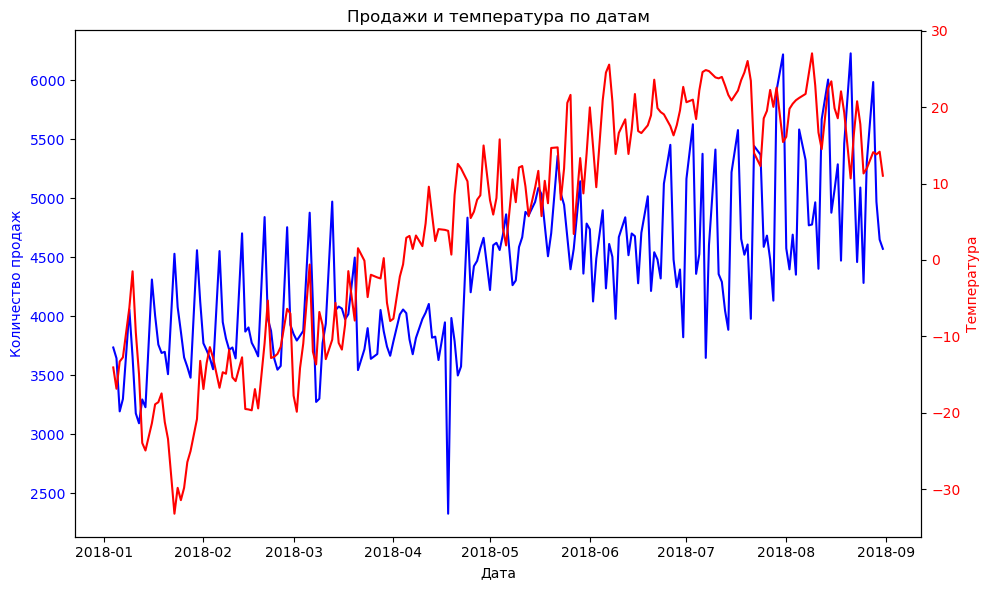

In [33]:
# Plotting the aforementioned graph
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(fin_df['Дата'], fin_df['Daily_sales'], label='Количество продаж', color='b')
ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество продаж', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax2 = ax1.twinx()
ax2.plot(fin_df['Дата'], fin_df['T'], label='Температура', color='r')
ax2.set_ylabel('Температура', color='r')
ax2.tick_params(axis='y', labelcolor='r')
plt.title('Продажи и температура по датам')
fig.tight_layout()
plt.show()

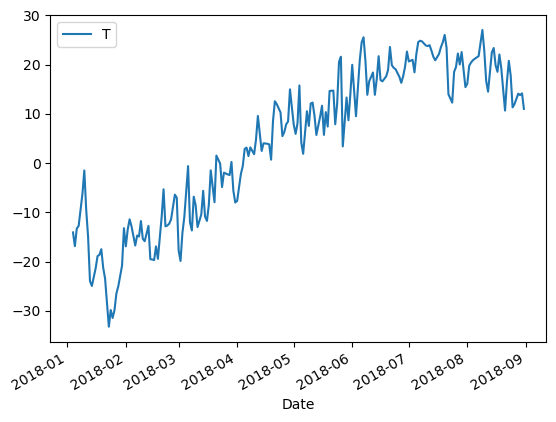

In [34]:
# Plotting the temperature graph separately
fin_df.plot(x='Date',y='T');